# 04. Классификация, логистическая регрессия и метрики качества

В этом блокноте мы разберём:
- постановку задачи бинарной классификации;
- идею логистической регрессии и вероятностный выход модели;
- ключевые метрики качества (accuracy, precision, recall, F1, ROC-AUC);
- практический пример на синтетических данных.

## 1. Задача бинарной классификации

Пусть целевая переменная принимает два значения, например:
- 0 — класс «не спам»,
- 1 — класс «спам».

Наша цель — по признакам письма предсказать **вероятность** того, что письмо относится к классу 1 (спам), а затем принять решение о классе (например, порогом 0.5).

Логистическая регрессия — это модель, которая предсказывает **вероятность класса 1** с помощью сигмоидной функции.

## 2. Логистическая регрессия: идея

Вместо того чтобы предсказывать значение $y$ напрямую, модель даёт **оценку вероятности** $P(y = 1 \mid x)$.

Модель имеет вид:

$$
z = w_0 + w^T x,
$$

$$
P(y = 1 \mid x) = \sigma(z) = \frac{1}{1 + e^{-z}},
$$

где $\sigma(\cdot)$ — **сигмоида**.

Сигмоида преобразует любое вещественное число в интервал $(0, 1)$, что удобно для вероятностей.

Для обучения используется **логарифмическая функция потерь** (логистическая потеря, binary cross-entropy). Для одного объекта с меткой $y \in \{0, 1\}$ и предсказанной вероятностью $p = \sigma(z)$:

$$
\mathcal{L}(y, p) = -\bigl[ y \log(p) + (1 - y) \log(1 - p) \bigr].
$$

По всей выборке из $n$ объектов усреднённая функция потерь имеет вид:

$$
L(w) = -\frac{1}{n} \sum_{i=1}^{n} \Bigl[ y^{(i)} \log\bigl(\sigma(z^{(i)})\bigr) + (1 - y^{(i)}) \log\bigl(1 - \sigma(z^{(i)})\bigr) \Bigr],
$$

где $z^{(i)} = w_0 + w^T x^{(i)}$. Минимизация $L(w)$ выполняется градиентными методами (например, градиентный спуск).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix
)

plt.style.use("seaborn-v0_8-whitegrid")

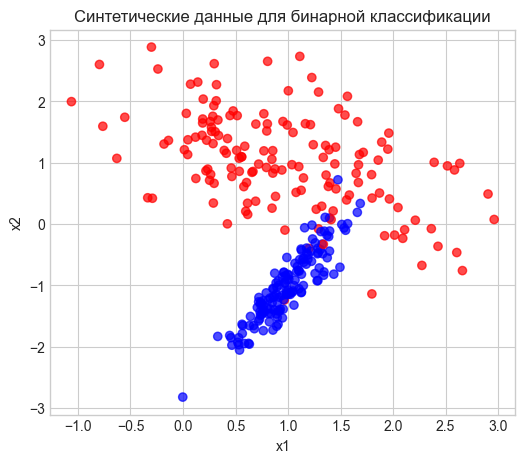

In [2]:
# Сгенерируем простой двумерный датасет для бинарной классификации

X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42,
)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", alpha=0.7)
plt.title("Синтетические данные для бинарной классификации")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [3]:
# Обучим логистическую регрессию

model = LogisticRegression()
model.fit(X, y)

probs = model.predict_proba(X)[:, 1]  # вероятность класса 1
pred_labels = model.predict(X)

print("Первые 5 вероятностей класса 1:", probs[:5])
print("Первые 5 предсказанных меток:", pred_labels[:5])

Первые 5 вероятностей класса 1: [7.26191240e-03 9.39724069e-01 7.66632470e-04 5.11584504e-01
 9.62531956e-01]
Первые 5 предсказанных меток: [0 1 0 1 1]


## 3. Метрики качества классификации

Пусть у нас есть **истинные метки** и **предсказанные метки**. Тогда можно составить **матрицу ошибок (confusion matrix)**:

- TP (True Positive) — истинно положительные,
- TN (True Negative) — истинно отрицательные,
- FP (False Positive) — ложноположительные,
- FN (False Negative) — ложноотрицательные.

На основе этих величин определяются метрики:

- **Accuracy**: доля правильных предсказаний.
  $$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}. $$
- **Precision** (точность): среди предсказанных положительных, сколько действительно положительные.
  $$ \text{Precision} = \frac{TP}{TP + FP}. $$
- **Recall** (полнота): среди всех реальных положительных, сколько мы нашли.
  $$ \text{Recall} = \frac{TP}{TP + FN}. $$
- **F1-мера**: гармоническое среднее precision и recall.
  $$ F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}. $$

Для вероятностных классификаторов часто используют **ROC-кривую** и **площадь под кривой ROC-AUC**.

In [4]:
# Посчитаем метрики

acc = accuracy_score(y, pred_labels)
prec = precision_score(y, pred_labels)
rec = recall_score(y, pred_labels)
f1 = f1_score(y, pred_labels)
roc_auc = roc_auc_score(y, probs)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

cm = confusion_matrix(y, pred_labels)
print("\nConfusion matrix:\n", cm)

Accuracy: 0.930
Precision: 0.927
Recall: 0.933
F1-score: 0.930
ROC-AUC: 0.980

Confusion matrix:
 [[139  11]
 [ 10 140]]


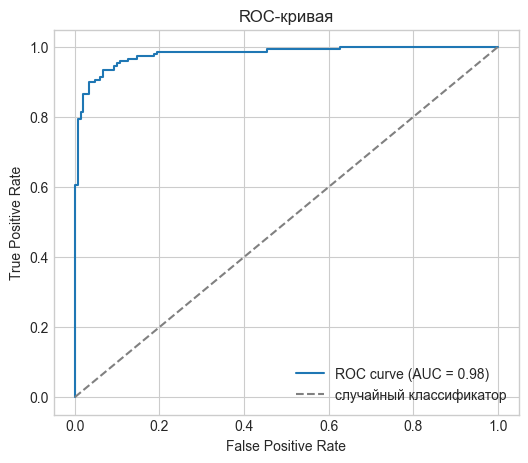

In [5]:
# ROC-кривая

fpr, tpr, thresholds = roc_curve(y, probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="случайный классификатор")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.legend()
plt.show()

## 4. Влияние порога на метрики

По умолчанию `model.predict` использует порог 0.5: если $P(y=1 \mid x) \ge 0.5$, то предсказывается класс 1.

Если изменить порог (например, на 0.3 или 0.8), то:
- количество TP, FP, TN, FN изменится,
- вырастет одна метрика, но может упасть другая (compromise между precision и recall).

В задачах с **несбалансированными классами** (например, мошеннические транзакции) accuracy может быть обманчивой метрикой, и нужно смотреть на precision/recall/F1/ROC-AUC.

## 6. Задания

**Теория**

1. Объясните своими словами разницу между accuracy, precision и recall.
2. Приведите пример задачи, где важнее высокая **precision**, чем высокая **recall**, и наоборот.
3. Почему ROC-AUC удобно использовать для сравнения моделей?

**Практика**

1. Измените параметр `random_state` в генерации данных (`make_classification`) и посмотрите, как меняются метрики.
2. Рассчитайте метрики для разных порогов классификации (например, 0.3, 0.5, 0.7), вручную получив предсказанные метки из `probs`.
3. Попробуйте сделать классы несбалансированными (параметр `weights` в `make_classification`) и сравните accuracy и F1-score. Какой вывод можно сделать?

В следующем ноутбуке мы поговорим о **переобучении**, **разделении на train/validation/test**, **кросс-валидации** и **регуляризации**.

### Решения: теория

1. **Accuracy** — доля правильных ответов среди всех. **Precision** — среди объектов, предсказанных как класс 1, доля действительно класса 1. **Recall** — среди всех объектов класса 1, доля предсказанных как 1.

2. **Высокая precision важна**, когда ложные срабатывания дороги (например, спам: не хотим помечать хорошие письма как спам). **Высокая recall важна**, когда пропуск положительного класса опасен (например, диагностика: пропуск болезни хуже лишней проверки).

3. **ROC-AUC** не зависит от выбора порога и показывает, насколько хорошо модель ранжирует объекты по вероятности; удобно сравнивать модели на одном наборе данных одним числом.

In [6]:
# Решения: практика
# 1. Разные random_state — метрики немного меняются из-за другого разбиения данных
# 2. Метрики при порогах 0.3, 0.5, 0.7 (нужны probs и y_true из ячеек выше)
# Пример: probs = model.predict_proba(X_test)[:, 1]; y_true = y_test
# for thresh in [0.3, 0.5, 0.7]:
#     y_pred = (probs >= thresh).astype(int)
#     print(f"thresh={thresh}: acc={accuracy_score(y_true, y_pred):.3f}, P={precision_score(y_true, y_pred):.3f}, R={recall_score(y_true, y_pred):.3f}")

# 3. Несбалансированные классы (weights=[0.9, 0.1])
from sklearn.model_selection import train_test_split
X_imb, y_imb = make_classification(n_samples=500, weights=[0.9, 0.1], random_state=42)
X_tr, X_te, y_tr, y_te = train_test_split(X_imb, y_imb, test_size=0.3, random_state=42)
model_imb = LogisticRegression().fit(X_tr, y_tr)
y_pr = model_imb.predict(X_te)
print("Несбалансированные классы:")
print("Accuracy:", accuracy_score(y_te, y_pr))
print("F1-score:", f1_score(y_te, y_pr))
print("Вывод: при дисбалансе accuracy может быть высоким (предсказываем только мажоритарный класс), F1 лучше отражает качество по минорному классу.")

Несбалансированные классы:
Accuracy: 0.94
F1-score: 0.6666666666666666
Вывод: при дисбалансе accuracy может быть высоким (предсказываем только мажоритарный класс), F1 лучше отражает качество по минорному классу.
